In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
from tqdm import tqdm_notebook
import re

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
def tokenize(text):
    # obtains tokens with a least 1 alphabet
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

def mapping(tokens):
    word_to_id = dict()
    id_to_word = dict()

    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token

    return word_to_id, id_to_word

def generate_training_data(tokens, word_to_id, window_size):
    N = len(tokens)
    X, Y = [], []

    for i in range(N):
        nbr_inds = list(range(max(0, i - window_size), i)) + \
                   list(range(i + 1, min(N, i + window_size + 1)))
        #print(nbr_inds)
        #print(tokens[i])
        for j in nbr_inds:
            X.append(word_to_id[tokens[i]])
            #print('X:',word_to_id[tokens[i]])
            #print(tokens[j])
            Y.append(word_to_id[tokens[j]])
            #print('Y:',word_to_id[tokens[j]])
            
    X = np.array(X)
    X = np.expand_dims(X, axis=0)
    Y = np.array(Y)
    Y = np.expand_dims(Y, axis=0)
            
    return X, Y

In [ ]:
doc = "After the deduction of the costs of investing, " \
      "beating the stock market is a loser's game."
tokens = tokenize(doc)
print(tokens)
word_to_id, id_to_word = mapping(tokens)
print(word_to_id)
print(id_to_word)
X, Y = generate_training_data(tokens, word_to_id, 3)
print(X)
print(Y)
vocab_size = len(id_to_word)
print(vocab_size)
m = Y.shape[1]
print(m)
# turn Y into one hot encoding
Y_one_hot = np.zeros((vocab_size, m))
Y_one_hot[Y.flatten(), np.arange(m)] = 1
print(Y_one_hot)

['after', 'the', 'deduction', 'of', 'the', 'costs', 'of', 'investing', 'beating', 'deduction', 'the', 'stock', 'market', 'deduction', 'is', 'a', "loser's", 'game']
{"loser's": 0, 'costs': 1, 'stock': 2, 'is': 3, 'after': 4, 'beating': 5, 'deduction': 6, 'of': 7, 'game': 8, 'the': 9, 'investing': 10, 'market': 11, 'a': 12}
{0: "loser's", 1: 'costs', 2: 'stock', 3: 'is', 4: 'after', 5: 'beating', 6: 'deduction', 7: 'of', 8: 'game', 9: 'the', 10: 'investing', 11: 'market', 12: 'a'}
[[ 4  4  4  9  9  9  9  6  6  6  6  6  7  7  7  7  7  7  9  9  9  9  9  9
   1  1  1  1  1  1  7  7  7  7  7  7 10 10 10 10 10 10  5  5  5  5  5  5
   6  6  6  6  6  6  9  9  9  9  9  9  2  2  2  2  2  2 11 11 11 11 11 11
   6  6  6  6  6  6  3  3  3  3  3  3 12 12 12 12 12  0  0  0  0  8  8  8]]
[[ 9  6  7  4  6  7  9  4  9  7  9  1  4  9  6  9  1  7  9  6  7  1  7 10
   6  7  9  7 10  5  7  9  1 10  5  6  9  1  7  5  6  9  1  7 10  6  9  2
   7 10  5  9  2 11 10  5  6  2 11  6  5  6  9 11  6  3  6  9  2  6  3

In [ ]:
Y.flatten()

array([ 7,  4,  8, 11,  4,  8,  7, 11,  7,  8,  7, 10, 11,  7,  4,  7, 10,
        8,  7,  4,  8, 10,  8, 12,  4,  8,  7,  8, 12,  9,  8,  7, 10, 12,
        9,  7,  7, 10,  8,  9,  7,  5, 10,  8, 12,  7,  5,  6,  8, 12,  9,
        5,  6,  3, 12,  9,  7,  6,  3,  1,  9,  7,  5,  3,  1,  0,  7,  5,
        6,  1,  0,  2,  5,  6,  3,  0,  2,  6,  3,  1,  2,  3,  1,  0])

In [ ]:
np.arange(84)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])

In [ ]:
Y.shape

(1, 84)

In [ ]:
def initialize_wrd_emb(vocab_size, emb_size):
    """
    vocab_size: int. vocabulary size of your corpus or training data
    emb_size: int. word embedding size. How many dimensions to represent each vocabulary
    """
    WRD_EMB = np.random.randn(vocab_size, emb_size) * 0.01
    
    # assert(WRD_EMB.shape == (vocab_size, emb_size))
    return WRD_EMB

def initialize_dense(input_size, output_size):
    """
    input_size: int. size of the input to the dense layer
    output_szie: int. size of the output out of the dense layer
    """
    W = np.random.randn(output_size, input_size) * 0.01
    
    #assert(W.shape == (output_size, input_size))
    return W

def initialize_parameters(vocab_size, emb_size):
    WRD_EMB = initialize_wrd_emb(vocab_size, emb_size)
    W = initialize_dense(emb_size, vocab_size)
    
    parameters = {}
    parameters['WRD_EMB'] = WRD_EMB
    parameters['W'] = W
    
    return parameters

In [ ]:
def ind_to_word_vecs(inds, parameters):
    """
    inds: numpy array. shape: (1, m)
    parameters: dict. weights to be trained
    """
    m = inds.shape[1]
    WRD_EMB = parameters['WRD_EMB']
    word_vec = WRD_EMB[inds.flatten(), :].T
    
    assert(word_vec.shape == (WRD_EMB.shape[1], m))
    
    return word_vec

def linear_dense(word_vec, parameters):
    """
    word_vec: numpy array. shape: (emb_size, m)
    parameters: dict. weights to be trained
    """
    m = word_vec.shape[1]
    W = parameters['W']
    Z = np.dot(W, word_vec)
    
    assert(Z.shape == (W.shape[0], m))
    
    return W, Z

def softmax(Z):
    """
    Z: output out of the dense layer. shape: (vocab_size, m)
    """
    softmax_out = np.divide(np.exp(Z), np.sum(np.exp(Z), axis=0, keepdims=True) + 0.001)
    
    assert(softmax_out.shape == Z.shape)
    return softmax_out

def forward_propagation(inds, parameters):
    word_vec = ind_to_word_vecs(inds, parameters)
    W, Z = linear_dense(word_vec, parameters)
    softmax_out = softmax(Z)
    
    caches = {}
    caches['inds'] = inds
    caches['word_vec'] = word_vec
    caches['W'] = W
    caches['Z'] = Z
    
    return softmax_out, caches

In [ ]:
def cross_entropy(softmax_out, Y):
    """
    softmax_out: output out of softmax. shape: (vocab_size, m)
    """
    m = softmax_out.shape[1]
    cost = -(1 / m) * np.sum(np.sum(Y * np.log(softmax_out + 0.001), axis=0, keepdims=True), axis=1)
    return cost

In [ ]:
def softmax_backward(Y, softmax_out):
    """
    Y: labels of training data. shape: (vocab_size, m)
    softmax_out: output out of softmax. shape: (vocab_size, m)
    """
    dL_dZ = softmax_out - Y
    
    assert(dL_dZ.shape == softmax_out.shape)
    return dL_dZ

def dense_backward(dL_dZ, caches):
    """
    dL_dZ: shape: (vocab_size, m)
    caches: dict. results from each steps of forward propagation
    """
    W = caches['W']
    word_vec = caches['word_vec']
    m = word_vec.shape[1]
    
    dL_dW = (1 / m) * np.dot(dL_dZ, word_vec.T)
    dL_dword_vec = np.dot(W.T, dL_dZ)

    assert(W.shape == dL_dW.shape)
    assert(word_vec.shape == dL_dword_vec.shape)
    
    return dL_dW, dL_dword_vec

def backward_propagation(Y, softmax_out, caches):
    dL_dZ = softmax_backward(Y, softmax_out)
    dL_dW, dL_dword_vec = dense_backward(dL_dZ, caches)
    
    gradients = dict()
    gradients['dL_dZ'] = dL_dZ
    gradients['dL_dW'] = dL_dW
    gradients['dL_dword_vec'] = dL_dword_vec
    
    return gradients

def update_parameters(parameters, caches, gradients, learning_rate):
    vocab_size, emb_size = parameters['WRD_EMB'].shape
    inds = caches['inds']
    dL_dword_vec = gradients['dL_dword_vec']
    m = inds.shape[-1]
    
    parameters['WRD_EMB'][inds.flatten(), :] -= dL_dword_vec.T * learning_rate

    parameters['W'] -= learning_rate * gradients['dL_dW']


In [ ]:
from datetime import datetime

import matplotlib.pyplot as plt


def skipgram_model_training(X, Y, vocab_size, emb_size, learning_rate, epochs, batch_size=256, parameters=None, print_cost=False, plot_cost=True):
    costs = []
    m = X.shape[1]
    
    if parameters is None:
        parameters = initialize_parameters(vocab_size, emb_size)
    
    begin_time = datetime.now()
    for epoch in range(epochs):
        epoch_cost = 0
        batch_inds = list(range(0, m, batch_size))
        #print(batch_inds)
        np.random.shuffle(batch_inds)
        for i in batch_inds:
            X_batch = X[:, i:i+batch_size]
            Y_batch = Y[:, i:i+batch_size]

            softmax_out, caches = forward_propagation(X_batch, parameters)
            gradients = backward_propagation(Y_batch, softmax_out, caches)
            update_parameters(parameters, caches, gradients, learning_rate)
            cost = cross_entropy(softmax_out, Y_batch)
            epoch_cost += np.squeeze(cost)
            
        costs.append(epoch_cost)
        if print_cost and epoch % (epochs // 500) == 0:
            print("Cost after epoch {}: {}".format(epoch, epoch_cost))
        if epoch % (epochs // 100) == 0:
            learning_rate *= 0.98
    end_time = datetime.now()
    print('training time: {}'.format(end_time - begin_time))
            
    if plot_cost:
        plt.plot(np.arange(epochs), costs)
        plt.xlabel('# of epochs')
        plt.ylabel('cost')
    return parameters

Cost after epoch 0: 2.552167871982209
Cost after epoch 10: 2.551886315779861
Cost after epoch 20: 2.551595027916827
Cost after epoch 30: 2.5512774669319125
Cost after epoch 40: 2.550916894686628
Cost after epoch 50: 2.550495223727193
Cost after epoch 60: 2.5500022662274797
Cost after epoch 70: 2.5494109263800753
Cost after epoch 80: 2.548695901468103
Cost after epoch 90: 2.547829011944994
Cost after epoch 100: 2.546777501776905
Cost after epoch 110: 2.545528252213946
Cost after epoch 120: 2.5440254104929148
Cost after epoch 130: 2.542218224576823
Cost after epoch 140: 2.540050891689443
Cost after epoch 150: 2.537459695248247
Cost after epoch 160: 2.5344329589852954
Cost after epoch 170: 2.5308606355859475
Cost after epoch 180: 2.5266560372903673
Cost after epoch 190: 2.521734221077226
Cost after epoch 200: 2.5160101419294496
Cost after epoch 210: 2.509531179820701
Cost after epoch 220: 2.502155730042855
Cost after epoch 230: 2.493832253236392
Cost after epoch 240: 2.484555625120194
Cos

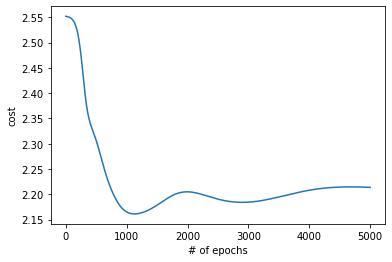

In [ ]:
paras = skipgram_model_training(X, Y_one_hot, vocab_size, 50, 0.05, 5000, batch_size=128, parameters=None, print_cost=True)

In [ ]:
X_test = np.arange(vocab_size)
print(X_test.shape)
X_test = np.expand_dims(X_test, axis=0)
print(X_test.shape)
softmax_test, _ = forward_propagation(X_test, paras)
print(softmax_test)
top_sorted_inds = np.argsort(softmax_test, axis=0)[-4:,:]
print(top_sorted_inds)

(13,)
(1, 13)
[[0.13800109 0.0524617  0.0331232  0.13829776 0.07920961 0.05140742
  0.13427312 0.01384239 0.13437721 0.0138581  0.00649474 0.03399432
  0.13836896]
 [0.01596826 0.01706903 0.00492235 0.01595091 0.14609616 0.17529387
  0.01877578 0.09111718 0.01901427 0.09084067 0.13156048 0.08032384
  0.0160552 ]
 [0.07419133 0.011359   0.03078567 0.07446574 0.03010627 0.19358167
  0.10034728 0.03576476 0.09999212 0.03585318 0.02262483 0.16986686
  0.07439608]
 [0.12147247 0.05886362 0.18191928 0.12085532 0.00976401 0.07139496
  0.14447256 0.02330484 0.14464643 0.02328538 0.00651482 0.14943693
  0.12096703]
 [0.03910247 0.05367718 0.01978526 0.03922286 0.09954017 0.04322865
  0.03348857 0.06085535 0.03365907 0.06118606 0.03265858 0.05955107
  0.03931032]
 [0.00867298 0.24933137 0.10046618 0.00864486 0.03980893 0.05983478
  0.02803561 0.06623055 0.02850586 0.06604231 0.13394993 0.01770831
  0.00869071]
 [0.07419986 0.05740191 0.23086895 0.07392824 0.01393987 0.066616
  0.07860209 0.25858

In [ ]:
for input_ind in range(vocab_size):
    print(input_ind)
    input_word = id_to_word[input_ind]
    print(input_word)
    print(top_sorted_inds[::-1,input_ind])
    output_words = [id_to_word[output_ind] for output_ind in top_sorted_inds[::-1, input_ind]]
    print("{}'s neighbor words: {}".format(input_word, output_words))
#After the deduction of the costs of investing, beating deduction the stock market deduction is a loser's game."

0
loser's
[ 8 11  0 12]
loser's's neighbor words: ['game', 'market', "loser's", 'a']
1
costs
[ 5  7 10  8]
costs's neighbor words: ['beating', 'of', 'investing', 'game']
2
stock
[ 6  3 11  9]
stock's neighbor words: ['deduction', 'is', 'market', 'the']
3
is
[ 8 11  0 12]
is's neighbor words: ['game', 'market', "loser's", 'a']
4
after
[7 1 4 0]
after's neighbor words: ['of', 'costs', 'after', "loser's"]
5
beating
[ 2  1 10  3]
beating's neighbor words: ['stock', 'costs', 'investing', 'is']
6
deduction
[12  3  0  9]
deduction's neighbor words: ['a', 'is', "loser's", 'the']
7
of
[6 9 7 1]
of's neighbor words: ['deduction', 'the', 'of', 'costs']
8
game
[12  3  0  9]
game's neighbor words: ['a', 'is', "loser's", 'the']
9
the
[6 9 7 1]
the's neighbor words: ['deduction', 'the', 'of', 'costs']
10
investing
[9 7 5 1]
investing's neighbor words: ['the', 'of', 'beating', 'costs']
11
market
[ 6  2 12  3]
market's neighbor words: ['deduction', 'stock', 'a', 'is']
12
a
[ 8 11  0 12]
a's neighbor wo